In [36]:
import os
import re

import tensorflow as tf
import tensorflow.python.platform
from tensorflow.python.platform import gfile
import numpy as np
import pandas as pd
import sklearn
from sklearn import cross_validation
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC, LinearSVC
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

# import 
#     row = [str(epoch+1),str(acc),str(val_acc),str(val_loss)]
#     with open('train_log.csv', 'r') as csvFile:
#         writer = csv.writer(csvFile)
#         writer.writerow(row)
#     csvFile.close()

/home/rounak/.local/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [38]:
import tensorflow as tf
import numpy as np
import os,glob,cv2
import sys,argparse
import dataset
import matplotlib.pyplot as plt
# %matplotlib
# from dataset import *
from numpy import genfromtxt
# labels = genfromtxt('labels.txt', delimiter='\n')
# print(labels)
labels = []
with open('labels.txt', 'r') as f:
    for line in f:
        labels.append(line.strip())

print(labels)
# First, pass the path of the image
# dir_path = os.path.dirname(os.path.realpath(__file__))
#print(dir_path)
dir_path = os.path.dirname(os.path.realpath(''))

# dir_path = '/home/rounak/Documents/trial/'
# image_path=sys.argv[1] 
# dir_path = os.path.abspath(os.path.dirname(sys.argv[1]))
image_path = 'trial/papaya.jpg'
filename = dir_path + '/' +image_path
print(filename)
image_size=160
num_channels=3
images = []
# Reading the image using OpenCV
image = cv2.imread(filename)
# Resizing the image to our desired size and preprocessing will be done exactly as done during training
image = cv2.resize(image, (image_size, image_size),0,0, cv2.INTER_LINEAR)
images.append(image)
images = np.array(images, dtype=np.uint8)
images = images.astype('float32')
images = np.multiply(images, 1.0/255.0) 
#The input to the network is of shape [None image_size image_size num_channels]. Hence we reshape.
x_batch = images.reshape(1, image_size,image_size,num_channels)

## Let us restore the saved model 
sess = tf.Session()

# Step-1: Recreate the network graph. At this step only graph is created.
saver = tf.train.import_meta_graph('/home/rounak/Documents/trial/models/fruits-model.meta')
# saver = tf.train.import_meta_graph('/home/corse/st119979/Documents/project/new_models/fruits-model.meta')

# Step-2: Now let's load the weights saved using the restore method.
saver.restore(sess, tf.train.latest_checkpoint('/home/rounak/Documents/trial/models/'))
# saver.restore(sess, tf.train.latest_checkpoint('/home/corse/st119979/Documents/project/new_models/'))

# Accessing the default graph which we have restored
graph = tf.get_default_graph()

# Now, let's get hold of the op that we can be processed to get the output.
# In the original network y_pred is the tensor that is the prediction of the network
y_pred = graph.get_tensor_by_name("y_pred:0")
# dataset.load_train()
## Let's feed the images to the input placeholders
x= graph.get_tensor_by_name("x:0") 
y_true = graph.get_tensor_by_name("y_true:0") 
y_test_images = np.zeros((1, len(os.listdir('training_data')))) 


### Creating the feed_dict that is required to be fed to calculate y_pred 
feed_dict_testing = {x: x_batch, y_true: y_test_images}
result=sess.run(y_pred, feed_dict=feed_dict_testing)
# result is of this format [probabiliy_of_mango probability_of_apple]
# abc=sess.run(y_pred)
# print("\n",abc)
print("\n")

resultArray = np.argsort(result)
r=np.amax(result)
print( result)
# print("\n")
# shape = resultArray.shape
print(resultArray[0,13])
# print("\n")
print(labels[resultArray[0,-1]])
print(r)
# print(index)
# cv2.putText(labels[resultArray[0,13]])

cv2.putText(image, str(labels[resultArray[0,-1]])+ '=' + str(r), (5,10),
    cv2.FONT_HERSHEY_SIMPLEX, 0.35, (0,0,0),1)
# cv2.putText(image,labels[resultArray[0,-1]]), (x, h), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (255, 255, 255), lineType=cv2.LINE_AA)

cv2.namedWindow('image',0)
cv2.imshow("image",image)
# if cv2.waitKey(1) & 0xFF == ord('q'):
    # break
cv2.waitKey(0)

cv2.destroyAllWindows()

def plot_confusion_matrix(y_true,y_pred):
    cm_array = confusion_matrix(y_true,y_pred)
    true_labels = np.unique(y_true)
    pred_labels = np.unique(y_pred)
    plt.imshow(cm_array[:-1,:-1], interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion matrix", fontsize=16)
    cbar = plt.colorbar(fraction=0.046, pad=0.04)
    cbar.set_label('Number of images', rotation=270, labelpad=30, fontsize=12)
    xtick_marks = np.arange(len(true_labels))
    ytick_marks = np.arange(len(pred_labels))
    plt.xticks(xtick_marks, true_labels, rotation=90)
    plt.yticks(ytick_marks,pred_labels)
    plt.tight_layout()
    plt.ylabel('True label', fontsize=14)
    plt.xlabel('Predicted label', fontsize=14)
    fig_size = plt.rcParams["figure.figsize"]
    fig_size[0] = 12
    fig_size[1] = 12
    plt.rcParams["figure.figsize"] = fig_size

plot_confusion_matrix(y_test_images,y_pred)
# cv2.imshow(filename)
# cv2.waitkey()



['Pineapple', 'Mango', 'Strawberry', 'Apple', 'Lemon', 'Kiwi', 'Cherry', 'Papaya', 'Mulberry', 'Pomegranate', 'Lychee', 'Guava', 'Avacado', 'Banana']
/home/rounak/Documents/trial/papaya.jpg
INFO:tensorflow:Restoring parameters from /home/rounak/Documents/trial/models/fruits-model


[[6.8495041e-13 4.2231142e-11 5.1514955e-13 5.4967962e-17 9.9203209e-13
  9.7527026e-18 1.1186381e-19 1.0000000e+00 1.5841752e-15 7.1788685e-15
  5.9418932e-12 3.3166212e-14 6.5988651e-12 6.3582944e-11]]
7
Papaya
1.0


ValueError: Expected array-like (array or non-string sequence), got <tf.Tensor 'y_pred:0' shape=(?, 14) dtype=float32>

<Figure size 432x288 with 0 Axes>

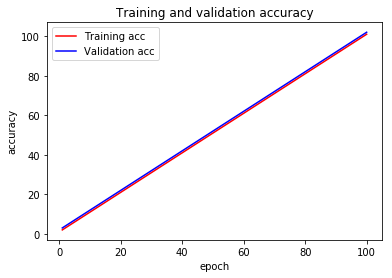

<Figure size 432x288 with 0 Axes>

In [23]:
train = pd.read_csv('train_log.csv', usecols = ['Epoch','Train_accuracy','validation_accuracy'])
train.head()
# epochs = train['Epoch']
# acc = train['Train_accuracy']
# val_acc = train['validation_accuracy']
# print(val_acc)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()

In [17]:
train['Epoch']


0       1
1       2
2       3
3       4
4       5
5       6
6       7
7       8
8       9
9      10
10     11
11     12
12     13
13     14
14     15
15     16
16     17
17     18
18     19
19     20
20     21
21     22
22     23
23     24
24     25
25     26
26     27
27     28
28     29
29     30
     ... 
70     71
71     72
72     73
73     74
74     75
75     76
76     77
77     78
78     79
79     80
80     81
81     82
82     83
83     84
84     85
85     86
86     87
87     88
88     89
89     90
90     91
91     92
92     93
93     94
94     95
95     96
96     97
97     98
98     99
99    100
Name: Epoch, Length: 100, dtype: int64

In [8]:
#Graphing our training and validation
acc = Train_accuracy
print(acc)
# val_acc = history.history[‘val_acc’]
# loss = history.history[‘loss’]
# val_loss = history.history[‘val_loss’]
# epochs = range(len(acc))
plt.plot(epochs, acc, ‘r’, label=’Training acc’)
plt.plot(epochs, val_acc, ‘b’, label=’Validation acc’)
plt.title(‘Training and validation accuracy’)
plt.ylabel(‘accuracy’) 
plt.xlabel(‘epoch’)
plt.legend()
plt.figure()
# plt.plot(epochs, loss, ‘r’, label=’Training loss’)
# plt.plot(epochs, val_loss, ‘b’, label=’Validation loss’)
# plt.title(‘Training and validation loss’)
# plt.ylabel(‘loss’) 
# plt.xlabel(‘epoch’)
# plt.legend()

NameError: name 'Train_accuracy' is not defined

In [9]:
import matplotlib.pyplot as plt
import csv

acc = []
loss = []

with open('train_log.csv','r') as csvfile:
    plots = csv.reader(csvfile, delimiter=',')
    for row in plots:
        acc.append(int(row[0]))
        loss.append(int(row[1]))

plt.plot(acc,loss, label='Loaded from file!')
plt.xlabel('acc')
plt.ylabel('loss')
plt.title('Interesting Graph\nCheck it out')
plt.legend()
plt.show()

ValueError: invalid literal for int() with base 10: 'Epoch'

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("train_log.csv", delim_whitespace=True)

plt.plot(df["Train_accuracy"], df["validation_accuracy"], 'ro--')
plt.show()

KeyError: 'Train_accuracy'